# Analysis on Increasing and Decreasing Crimes on Neighborhood
#### Crimes (Shootings, Homicide, Agg. Assault)
#### Years (2017, 2018, 2019, 2020, 2021, 2022)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats.distributions import chi2

In [ ]:
df = pd.read_csv("../Dataset/Part_1_Crime_Data.csv")

/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_6438/4064766686.py:1: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Dataset/Part_1_Crime_Data.csv")


In [ ]:
# Get a full picture of the columns

df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

In [ ]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589785 entries, 0 to 589784
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                588850 non-null  float64
 1   Y                588850 non-null  float64
 2   RowID            589785 non-null  int64  
 3   CCNumber         589785 non-null  object 
 4   CrimeDateTime    589785 non-null  object 
 5   CrimeCode        589785 non-null  object 
 6   Description      589785 non-null  object 
 7   Inside_Outside   538462 non-null  object 
 8   Weapon           146015 non-null  object 
 9   Post             581866 non-null  float64
 10  Gender           494895 non-null  object 
 11  Age              474807 non-null  float64
 12  Race             569662 non-null  object 
 13  Ethnicity        63458 non-null   object 
 14  Location         586728 non-null  object 
 15  Old_District     563544 non-null  object 
 16  New_District     18327 non-null   obje

In [ ]:
# View the data to understand the important columns

df.head(10)

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.610023,39.289875,1,23C00366,2023/03/02 02:17:00+00,6F,LARCENY,Inside,PERSONAL_WEAPONS,111.0,...,NaN,400 E BALTIMORE ST,CENTRAL,NaN,DOWNTOWN,39.289875,-76.610023,"(39.289875155299512,-76.610022671156329)",STREET,1
1,-76.610023,39.289875,2,23C00366,2023/03/02 02:17:00+00,6F,LARCENY,Inside,PERSONAL_WEAPONS,111.0,...,NaN,400 E BALTIMORE ST,CENTRAL,NaN,DOWNTOWN,39.289875,-76.610023,"(39.289875155299512,-76.610022671156329)",STREET,1
2,-76.609676,39.289694,3,23C06833,2023/03/02 00:13:00+00,4E,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,111.0,...,NOT_HISPANIC_OR_LATINO,400 E BALTIMORE ST,CENTRAL,NaN,DOWNTOWN,39.289694,-76.609676,"(39.289693999999997,-76.609675999999993)",TAVERN/NIGHT CLUB,1
3,-76.638088,39.288795,4,23C00663,2023/03/02 20:15:00+00,4E,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,711.0,...,NOT_HISPANIC_OR_LATINO,0 N CAREY ST,WESTERN,NaN,POPPLETON,39.288795,-76.638088,"(39.288795,-76.638087999999996)",OTHER/RESIDENTIAL,1
4,-76.628442,39.300400,5,23C00667,2023/03/02 22:10:00+00,4A,AGG. ASSAULT,Inside,FIREARM,123.0,...,UNKNOWN,500 DOLPHIN ST,CENTRAL,NaN,UPTON,39.300400,-76.628442,"(39.300400000000003,-76.628442000000007)",STREET,1
5,-76.583949,39.358397,6,23C00819,2023/03/02 16:30:00+00,6D,LARCENY FROM AUTO,Inside,NaN,415.0,...,NaN,1600 E BELVEDERE AVE,NORTHEAST,NaN,LOCH RAVEN,39.358397,-76.583949,"(39.358396999999997,-76.583949000000004)",SHED/GARAGE,1
6,-76.562699,39.368583,7,23C00827,2023/03/02 19:00:00+00,6D,LARCENY FROM AUTO,Outside,NaN,423.0,...,NaN,6800 STURBRIDGE DR,NORTHEAST,NaN,HAMILTON HILLS,39.368583,-76.562699,"(39.368583000000001,-76.562698999999995)",OTHER/RESIDENTIAL,1
7,-76.668293,39.337064,8,23C00365,2023/03/02 02:00:00+00,4B,AGG. ASSAULT,Outside,POISON,613.0,...,NOT_HISPANIC_OR_LATINO,2900 GRANTLEY AVE,NORTHWEST,NaN,TOWANDA-GRANTLEY,39.337064,-76.668293,"(39.337063999999998,-76.668293000000006)",OTHER/RESIDENTIAL,1
8,-76.610023,39.289875,9,23C00366,2023/03/02 02:17:00+00,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,111.0,...,UNKNOWN,400 E BALTIMORE ST,CENTRAL,NaN,DOWNTOWN,39.289875,-76.610023,"(39.289875155299512,-76.610022671156329)",STREET,1
9,-76.690916,39.324766,10,23C00664,2023/03/02 21:10:00+00,4E,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,621.0,...,NaN,4200 WENTWORTH RD,NORTHWEST,NaN,FOREST PARK GOLF COURSE,39.324766,-76.690916,"(39.324765999999997,-76.690916000000001)",OTHER/RESIDENTIAL,1


In [ ]:
# Find the unique value but first turn them into lowercase and trim the unexpected spaces

Total_Unique_Neighborhood = len(df["Neighborhood"].sort_values().str.lower().str.strip().unique())

print("The total number of Unique Neighorbood in the dataset", Total_Unique_Neighborhood)


The total number of Unique Neighorbood in the dataset 279


In [ ]:
# Drop the columns that wont be used

df_center = df.drop(['X', 'Y', 'RowID', 'CCNumber',  'CrimeCode',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
      ], axis=1)

In [ ]:
# New column names
new_column_names = {"Description": "Crimes", "CrimeDateTime": "Years", "Neighborhood": "Neighborhood", "Total_Incidents": "Total Incidents"}

# Create Neighborhood Data in a same order
df_center["Neighborhood"] = df_center["Neighborhood"].str.capitalize()

# Create Description Data in a same order
df_center["Description"] = df_center["Description"].str.capitalize()

# Get one the year in the crimedatetime column
df_center['CrimeDateTime'] = df_center['CrimeDateTime'].apply(lambda x: x[:4])

# Rename the columns names
data = df_center.rename(columns = new_column_names)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589785 entries, 0 to 589784
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Years            589785 non-null  object
 1   Crimes           589785 non-null  object
 2   Neighborhood     581412 non-null  object
 3   Total Incidents  589785 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 18.0+ MB


In [ ]:
# Drop all rows in Years that arent between 2017-2022
data = data[data["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in Crimes that arent [Murder, Shooting, Agg.Assualts]
data = data[data["Crimes"].isin(["Homicide", "Shooting", "Agg. assault"])]

data = data.reset_index(drop=True)

In [ ]:
data["Years"].value_counts()

Years
2022    7143
2017    6909
2019    6849
2021    6723
2018    6617
2020    6403
Name: count, dtype: int64

In [ ]:
#The crime that will be considered

data['Crimes'].unique()

array(['Agg. assault', 'Shooting', 'Homicide'], dtype=object)

In [ ]:
# Group the data By Year and Neighborhood b summing the Total incidents of above crimes

groupData = data.groupby(by=["Years", "Neighborhood"]).sum().agg(list).reset_index()

In [ ]:
groupData.head()

,Years,Neighborhood,Crimes,Total Incidents
0,2017,Abell,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,12
1,2017,Allendale,Agg. assaultShootingHomicideAgg. assaultAgg. a...,48
2,2017,Arcadia,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6
3,2017,Arlington,Agg. assaultAgg. assaultHomicideAgg. assaultAg...,57
4,2017,Armistead gardens,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,25


In [ ]:
neighborhood = groupData["Neighborhood"].unique()

data_2017 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2017") & (groupData["Neighborhood"] == i)]["Total Incidents"].values

   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2017.append(0)

   else:
      data_2017.append(value[0])


data_2018 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2018") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2018.append(0)

   else:
      data_2018.append(value[0])

data_2019 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2019") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2019.append(0)

   else:
      data_2019.append(value[0])

data_2020 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2020") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2020.append(0)

   else:
      data_2020.append(value[0])


data_2021 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2021") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2021.append(0)

   else:
      data_2021.append(value[0])

data_2022 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2022") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2022.append(0)

   else:
      data_2022.append(value[0])


In [ ]:
# Create a two dimensino array that represents all incidents from 2017-2022

two_dimension_data = np.vstack([data_2017, data_2018, data_2019,data_2020,data_2021, data_2022])

data_shape  = two_dimension_data.shape

print(f"The shape of the data is {data_shape} that represents 6 years and 273 neighbors")

The shape of the data is (6, 273) that represents 6 years and 273 neighbors


In [ ]:
two_dimension_data

array([[12, 48,  6, ...,  0,  0,  0],
       [13, 56,  9, ...,  0,  0,  0],
       [10, 48,  7, ...,  2,  0,  0],
       [ 7, 24, 10, ...,  0,  1,  0],
       [ 8, 48,  6, ...,  0,  0,  1],
       [13, 35,  5, ...,  0,  0,  0]])

## Increasing Neighborhoods

In [ ]:
results = []
def change_rate(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]) and (arr[5] > arr[4]):

            results.append(6)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]):

            results.append(5)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]):

            results.append(4)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]):

            results.append(3)

        else:
            results.append(0)


change_rate(two_dimension_data)

In [ ]:
def find_all_indices(arr, target):
    indices = [i for i, value in enumerate(arr) if value == target]
    return indices

indices_for_five = find_all_indices(results, 5)

indices_for_four = find_all_indices(results, 4)


In [ ]:
# Indices of five and fours

print("Indices of five", indices_for_five)

print("Indices of four", indices_for_four)

Indices of five [90, 193]
Indices of four [68, 83, 118, 131, 136, 163, 178, 265]


In [ ]:
# Extract the increasing neighborhoods

increasing_neighborhood = neighborhood[[90,193, 68,83, 118]]

print("The increasing neighborhood are: ", increasing_neighborhood)


The increasing neighborhood are:  ['Glen oaks' 'Pulaski industrial area' 'Edgewood' 'Frankford' 'Irvington']


In [ ]:
# Dataframe for increaseing neighbourhoods

df_increasing_neighborhood = groupData[groupData["Neighborhood"].isin(increasing_neighborhood)].reset_index()

df_increasing_neighborhood

,index,Years,Neighborhood,Crimes,Total Incidents
0,68,2017,Edgewood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,32
1,83,2017,Frankford,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,121
2,90,2017,Glen oaks,Agg. assaultAgg. assaultHomicideAgg. assaultAg...,14
3,118,2017,Irvington,HomicideAgg. assaultAgg. assaultHomicideShooti...,51
4,193,2017,Pulaski industrial area,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,23
5,322,2018,Edgewood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,34
6,336,2018,Frankford,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,147
7,343,2018,Glen oaks,Agg. assaultHomicideAgg. assaultAgg. assaultSh...,15
8,372,2018,Irvington,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,56
9,449,2018,Pulaski industrial area,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,24


<Axes: title={'center': 'Pulaski Industrial Area Graph'}, xlabel='Years'>

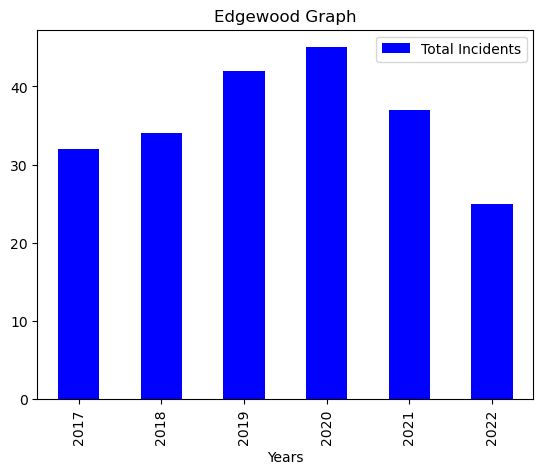

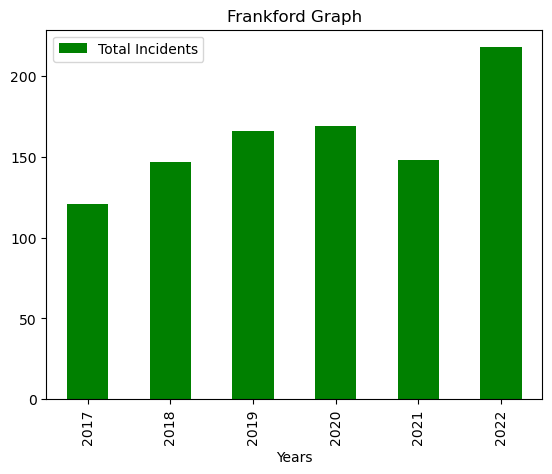

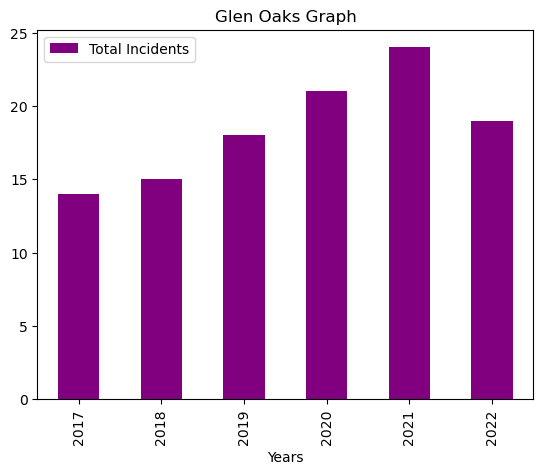

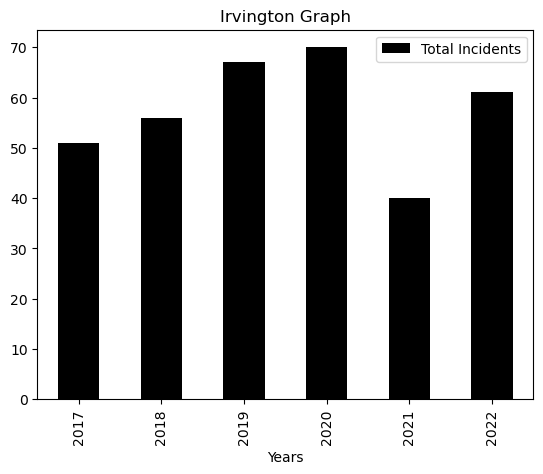

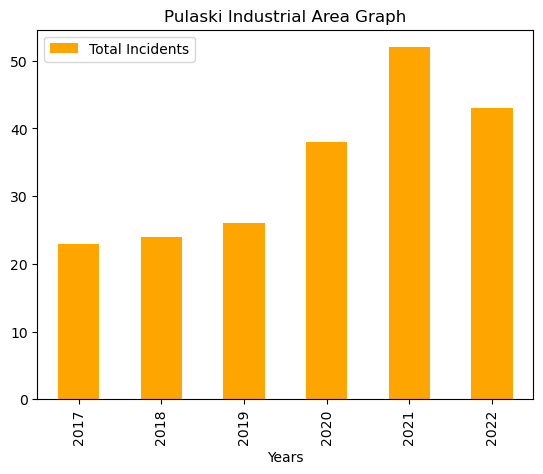

In [ ]:
# Create a dataframe for every increasing neighborhood

df_edgewood = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Edgewood"]

df_frankford = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Frankford"]

df_glenoaks = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Glen oaks"]

df_irvington = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Irvington"]

df_pulaskiindustrialarea = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Pulaski industrial area"]


# Plot all the graph of the neighborhood

df_edgewood.plot(x="Years", y="Total Incidents", kind='bar', title="Edgewood Graph", color="blue")

df_frankford.plot(x="Years", y="Total Incidents",kind='bar', title="Frankford Graph", color="green")

df_glenoaks.plot(x="Years", y="Total Incidents",kind='bar', title="Glen Oaks Graph", color="purple")

df_irvington.plot(x="Years", y="Total Incidents",kind='bar', title="Irvington Graph", color="black")

df_pulaskiindustrialarea.plot(x="Years", y="Total Incidents",kind='bar', title="Pulaski Industrial Area Graph", color="Orange")



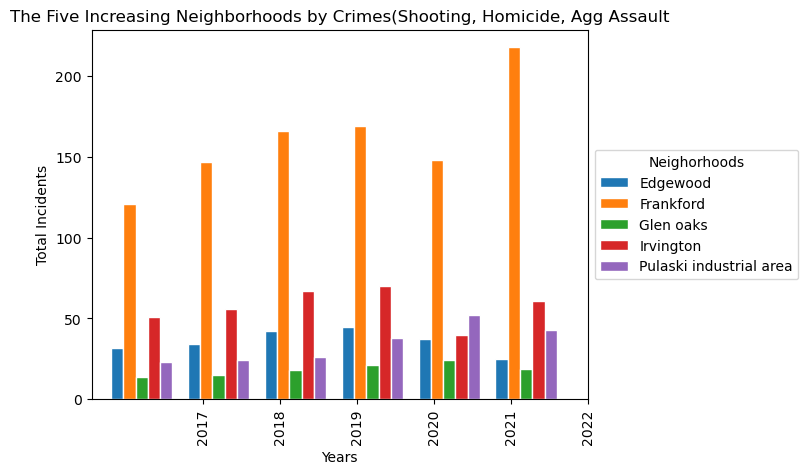

In [ ]:
pivot_increasing_neighborhood = df_increasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')



pivot_increasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Increasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()

In [ ]:
pivot_increasing_neighborhood

Neighborhood,Edgewood,Frankford,Glen oaks,Irvington,Pulaski industrial area
Years,,,,,
2017,32,121,14,51,23
2018,34,147,15,56,24
2019,42,166,18,67,26
2020,45,169,21,70,38
2021,37,148,24,40,52
2022,25,218,19,61,43


## Decreasing Neighborhood

In [ ]:
decreasing_results = []

def decreasing_fuction(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] < arr[0]) and (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

           decreasing_results.append(6)

        elif (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(5)

        elif (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(4)

        elif (arr[4] < arr[3]) and (arr[5] < arr[4]):


            decreasing_results.append(3)

        elif (arr[5] < arr[4]):

            decreasing_results.append(3)

        else:
            decreasing_results.append(0)


decreasing_fuction(two_dimension_data)

In [ ]:
indices_for_five_d = find_all_indices(decreasing_results, 5)

indices_for_four_d = find_all_indices(decreasing_results, 4)

indices_for_five_d, indices_for_four_d


([21, 66], [34, 123, 145, 153, 188, 195, 210])

In [ ]:
# Extract the decreasing neighborhoods

decreasing_neighborhood = neighborhood[[21,66,34,123,145]]

print("The increasing neighborhood are: ", decreasing_neighborhood)

The increasing neighborhood are:  ['Bridgeview/greenlawn' 'Easterwood' 'Carroll-south hilton' 'Kresson'
 'Middle branch/reedbird parks']


In [ ]:
# Dataframe for increaseing neighbourhoods

df_decreasing_neighborhood = groupData[groupData["Neighborhood"].isin(decreasing_neighborhood)].reset_index()

df_decreasing_neighborhood

,index,Years,Neighborhood,Crimes,Total Incidents
0,21,2017,Bridgeview/greenlawn,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,32
1,34,2017,Carroll-south hilton,Agg. assaultAgg. assaultAgg. assaultShootingHo...,13
2,66,2017,Easterwood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,18
3,123,2017,Kresson,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,16
4,145,2017,Middle branch/reedbird parks,Agg. assaultShootingAgg. assaultAgg. assaultAg...,13
5,276,2018,Bridgeview/greenlawn,Agg. assaultAgg. assaultAgg. assaultShootingAg...,34
6,289,2018,Carroll-south hilton,Agg. assaultHomicideAgg. assaultHomicideShooti...,24
7,320,2018,Easterwood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,24
8,379,2018,Kresson,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,8
9,399,2018,Middle branch/reedbird parks,Agg. assaultShootingHomicideAgg. assaultAgg. a...,19


<Axes: title={'center': 'Middle branch/reedbird parks Graph'}, xlabel='Years'>

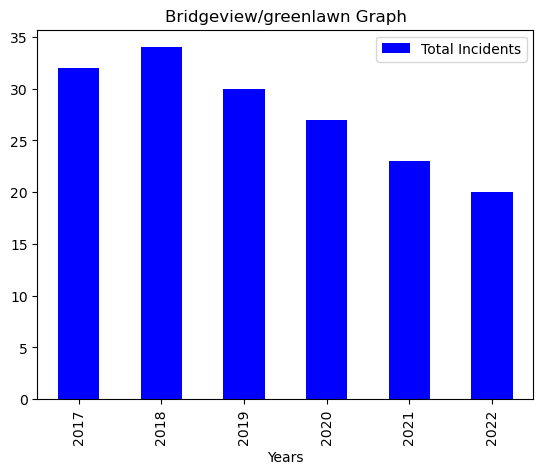

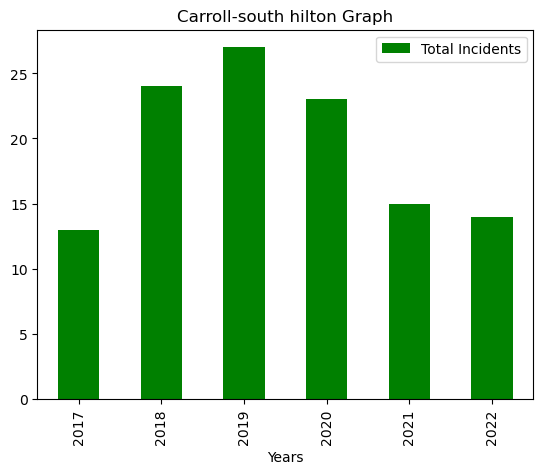

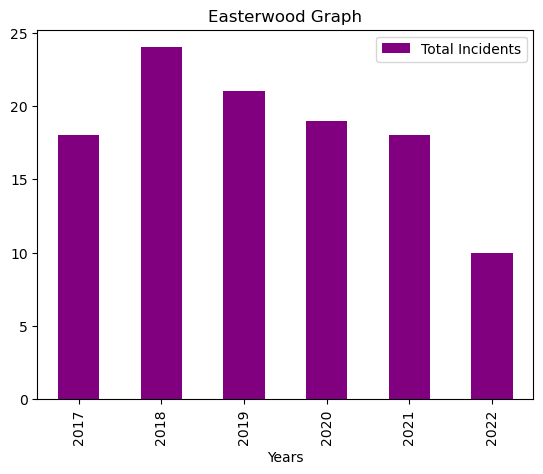

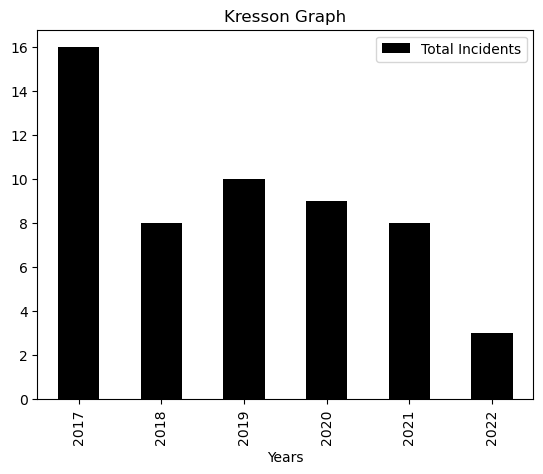

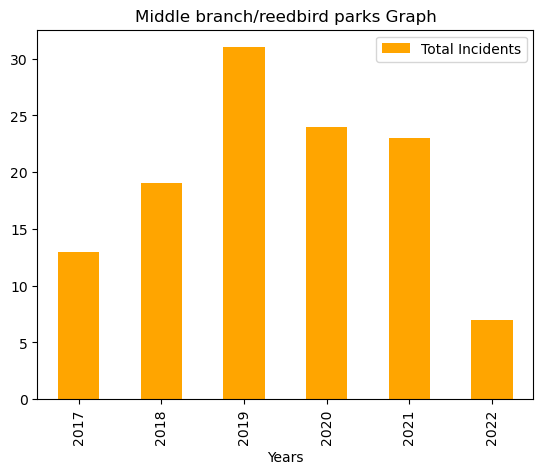

In [ ]:
# Create a dataframe for every increasing neighborhood

df_bridgeviewgreenlawn = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Bridgeview/greenlawn"]

df_carrollsouthhilton = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Carroll-south hilton"]

df_easterwood = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Easterwood"]

df_kresson = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Kresson"]

df_middlebranchreedbirdparks = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Middle branch/reedbird parks"]


# Plot all the graph of the neighborhood

df_bridgeviewgreenlawn.plot(x="Years", y="Total Incidents", kind='bar', title="Bridgeview/greenlawn Graph", color="blue")

df_carrollsouthhilton.plot(x="Years", y="Total Incidents",kind='bar', title="Carroll-south hilton Graph", color="green")

df_easterwood.plot(x="Years", y="Total Incidents",kind='bar', title="Easterwood Graph", color="purple")

df_kresson.plot(x="Years", y="Total Incidents",kind='bar', title="Kresson Graph", color="black")

df_middlebranchreedbirdparks.plot(x="Years", y="Total Incidents",kind='bar', title="Middle branch/reedbird parks Graph", color="Orange")



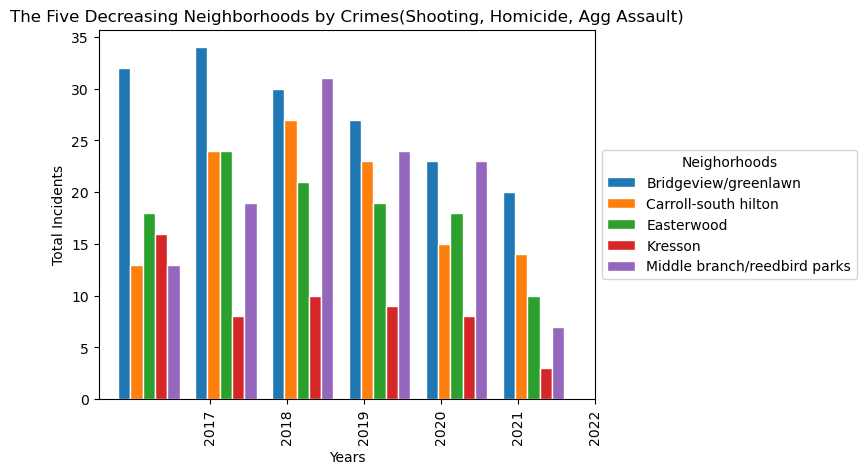

In [ ]:
pivot_decreasing_neighborhood = df_decreasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')

pivot_decreasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Decreasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()



In [ ]:
pivot_decreasing_neighborhood

Neighborhood,Bridgeview/greenlawn,Carroll-south hilton,Easterwood,Kresson,Middle branch/reedbird parks
Years,,,,,
2017,32,13,18,16,13
2018,34,24,24,8,19
2019,30,27,21,10,31
2020,27,23,19,9,24
2021,23,15,18,8,23
2022,20,14,10,3,7


## Overview Findings

In [ ]:
# Group the data by years

data_group_year = groupData.groupby("Years").sum().agg(list).reset_index()

In [ ]:
data_group_year

,Years,Neighborhood,Crimes,Total Incidents
0,2017,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6800
1,2018,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6525
2,2019,AbellAllendaleArcadiaArlingtonArmistead garden...,ShootingAgg. assaultAgg. assaultAgg. assaultAg...,6740
3,2020,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6311
4,2021,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6663
5,2022,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,7111


In [ ]:
total_incident_2017 = data_group_year[data_group_year["Years"] == "2017"]["Total Incidents"].values[0]
total_incident_2022 = data_group_year[data_group_year["Years"] == "2022"]["Total Incidents"].values[0]

In [ ]:
# Differents of Incidents from 2017 - 2022

difference_2017_2022 = total_incident_2022 - total_incident_2017

print("The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is: ", difference_2017_2022 )

The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is:  311


In [ ]:
# Percentange change from 2017 to 2022

percentange_change = round(((total_incident_2022 - total_incident_2017) / (total_incident_2017)) * 100, 2)

print("The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is: ", percentange_change,"%")

The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is:  4.57 %


# Hypothesis Testing

### Common Dataset that will be used throughout

In [ ]:
# The neighborhood that the test will be dealing with.

print("Increasing neighborhoods: ", increasing_neighborhood)
print("Decreasing neighborhoods: ", decreasing_neighborhood)

Increasing neighborhoods:  ['Glen oaks' 'Pulaski industrial area' 'Edgewood' 'Frankford' 'Irvington']
Decreasing neighborhoods:  ['Bridgeview/greenlawn' 'Easterwood' 'Carroll-south hilton' 'Kresson'
 'Middle branch/reedbird parks']


In [ ]:
#  Increasing and decreasing Dataset after melt

df_pivot_increasing = pivot_increasing_neighborhood.reset_index()

melted_df_increasing_neighborhood = pd.melt(df_pivot_increasing, id_vars=['Years'], var_name='Neighborhood', value_name='Total Incidents')

df_pivot_decreasing = pivot_decreasing_neighborhood.reset_index()

melted_df_decreasing_neighborhood = pd.melt(df_pivot_decreasing, id_vars=['Years'], var_name='Neighborhood', value_name='Total Incidents')

In [ ]:
# import dataset
df_vacant_building_notice = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/Vacant_Building_Notices.csv")
df_vacant_building_rehabs = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/Vacant_Building_Rehabs.csv")
df_gun_offenders = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/Gun_Offenders_Registry.csv")
df_bpd_arrests = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/BPD_Arrests.csv")


# import 311 calls
df_customer_call_2017 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2017.csv")
df_customer_call_2018 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2018.csv")
df_customer_call_2019 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2019.csv")
df_customer_call_2020 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2020.csv")


/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_6438/197137000.py:10: DtypeWarning: Columns (14,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer_call_2018 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2018.csv")
/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_6438/197137000.py:11: DtypeWarning: Columns (16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer_call_2019 = pd.read_csv("../Dataset/Hypothesis_Dataset/331_calls/311_Customer_Service_Requests_2019.csv")


### 1. Vacant Bulding Notice Analysis

In [ ]:
df_vacant_building_notice.head()

,X,Y,OBJECTID,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address
0,1.411074e+06,598468.355480,723192,805231A,2012/01/25 15:37:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 003,2041 W NORTH AVE
1,1.411088e+06,598469.087434,723193,1780434A,2019/04/20 08:55:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 004,2039 W NORTH AVE
2,1.411131e+06,598471.043467,723196,927919A,2013/02/01 14:19:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 007,2033 W NORTH AVE
3,1.411144e+06,598471.677324,723197,2106499A,2022/05/13 16:20:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 008,2031 W NORTH AVE
4,1.411214e+06,598474.912882,723202,2078873A,2022/02/10 16:01:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 013,2021 W NORTH AVE


In [ ]:
df_vacant_building_notice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          13614 non-null  float64
 1   Y                          13614 non-null  float64
 2   OBJECTID                   13614 non-null  int64  
 3   NoticeNum                  13614 non-null  object 
 4   DateNotice                 13614 non-null  object 
 5   DateCancel                 0 non-null      float64
 6   DateAbate                  0 non-null      float64
 7   NT                         13614 non-null  object 
 8   OWNER_ABBR                 1073 non-null   object 
 9   HousingMarketTypology2017  13590 non-null  object 
 10  Council_District           13614 non-null  int64  
 11  Neighborhood               13614 non-null  object 
 12  BLOCKLOT                   13614 non-null  object 
 13  Address                    13614 non-null  obj

In [ ]:
# Visualizing the object column

df_vacant_building_notice["Neighborhood"].unique()

array(['EASTERWOOD                               ',
       'SANDTOWN-WINCHESTER                      ',
       'MIDTOWN-EDMONDSON                        ',
       'BRIDGEVIEW/GREENLAWN                     ',
       'HARLEM PARK                              ',
       'PENROSE/FAYETTE STREET OUTREACH          ',
       'FRANKLIN SQUARE                          ',
       'POPPLETON                                ',
       'BOYD-BOOTH                               ',
       'UNION SQUARE                             ',
       'HOLLINS MARKET                           ',
       'SHIPLEY HILL                             ',
       'CARROLLTON RIDGE                         ',
       'NEW SOUTHWEST/MOUNT CLARE                ',
       'WASHINGTON VILLAGE/PIGTOWN               ',
       'MILLHILL                                 ',
       'PENN NORTH                               ',
       'DRUID HEIGHTS                            ',
       'UPTON                                    ',
       'MADI

In [ ]:
df_vacant_building_notice.columns

Index(['X', 'Y', 'OBJECTID', 'NoticeNum', 'DateNotice', 'DateCancel',
       'DateAbate', 'NT', 'OWNER_ABBR', 'HousingMarketTypology2017',
       'Council_District', 'Neighborhood', 'BLOCKLOT', 'Address'],
      dtype='object')

In [ ]:
# Drop the table that are not used
df_vacant_building_notice = df_vacant_building_notice.drop(['X', 'Y', 'OBJECTID', 'NoticeNum', 'DateCancel','DateAbate', 'NT', 'OWNER_ABBR', 'HousingMarketTypology2017',
       'Council_District', 'BLOCKLOT', 'Address'], axis=1)


In [ ]:
# New column names
df_vacant_building_notice_newcolumns = {"DateNotice": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_vacant_building_notice["Neighborhood"] = df_vacant_building_notice["Neighborhood"].astype(str)
df_vacant_building_notice["Neighborhood"] = df_vacant_building_notice["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_vacant_building_notice['DateNotice'] = df_vacant_building_notice['DateNotice'].apply(lambda x: x[:4])

# Rename the columns names
df_vacant_building_notice = df_vacant_building_notice.rename(columns = df_vacant_building_notice_newcolumns)


In [ ]:
# ['Loch raven', 'Lucille park', 'Northwest community action','Parklane', 'Stadium area']

In [ ]:
# Visualizing the change of year and Neighborhood dataset
df_vacant_building_notice.head()

,Years,Neighborhood
0,2012,Easterwood
1,2019,Easterwood
2,2013,Easterwood
3,2022,Easterwood
4,2022,Easterwood


In [ ]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_vacant_building_notice = df_vacant_building_notice[df_vacant_building_notice["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_vacant_building_notice_increasing = df_vacant_building_notice[df_vacant_building_notice["Neighborhood"].isin(increasing_neighborhood)]
df_vacant_building_notice_decreasing = df_vacant_building_notice[df_vacant_building_notice["Neighborhood"].isin(decreasing_neighborhood)]


df_vacant_building_notice_decreasing = df_vacant_building_notice_decreasing.reset_index(drop=True)
df_vacant_building_notice_increasing = df_vacant_building_notice_increasing.reset_index(drop=True)


In [ ]:
# Visualize the dataset

df_vacant_building_notice_increasing

,Years,Neighborhood
0,2022,Irvington
1,2021,Irvington
2,2017,Irvington
3,2022,Irvington
4,2018,Irvington
...,...,...
58,2021,Frankford
59,2022,Frankford
60,2022,Frankford
61,2020,Frankford


In [ ]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year

df_vacant_building_notice_increasing = (
    df_vacant_building_notice_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

df_vacant_building_notice_decreasing = (
    df_vacant_building_notice_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

In [ ]:
df_vacant_building_notice_increasing

,Years,Neighborhood,Total Vacants
0,2017,Edgewood,1
1,2017,Frankford,1
2,2017,Irvington,3
3,2018,Edgewood,3
4,2018,Frankford,1
5,2018,Irvington,1
6,2019,Edgewood,6
7,2019,Frankford,1
8,2019,Irvington,3
9,2020,Edgewood,1


In [ ]:
df_vacant_building_notice_decreasing

,Years,Neighborhood,Total Vacants
0,2017,Bridgeview/greenlawn,1
1,2017,Easterwood,13
2,2018,Bridgeview/greenlawn,2
3,2018,Easterwood,12
4,2019,Bridgeview/greenlawn,2
5,2019,Easterwood,18
6,2019,Kresson,1
7,2020,Bridgeview/greenlawn,1
8,2020,Easterwood,7
9,2021,Bridgeview/greenlawn,3


In [ ]:
# You will find that not all the neighorhoods are in the grouped dataset only few of them are in the vacant dataset

print("The increasing neighborhoods after groupby: ", df_vacant_building_notice_increasing["Neighborhood"].unique())

print("The decreasing neighborhoods after groupby: ", df_vacant_building_notice_decreasing["Neighborhood"].unique())

The increasing neighborhoods after groupby:  ['Edgewood' 'Frankford' 'Irvington']
The decreasing neighborhoods after groupby:  ['Bridgeview/greenlawn' 'Easterwood' 'Kresson']


In [ ]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Notice

df_vacant_building_notice_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_vacant_building_notice_increasing, on=['Years', "Neighborhood"], how='inner')

df_vacant_building_notice_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_vacant_building_notice_decreasing, on=['Years', "Neighborhood"], how='inner')


In [ ]:
df_vacant_building_notice_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Edgewood,32,1
1,2018,Edgewood,34,3
2,2019,Edgewood,42,6
3,2020,Edgewood,45,1
4,2021,Edgewood,37,6
5,2022,Edgewood,25,10
6,2017,Frankford,121,1
7,2018,Frankford,147,1
8,2019,Frankford,166,1
9,2020,Frankford,169,2


In [ ]:
df_vacant_building_notice_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Bridgeview/greenlawn,32,1
1,2018,Bridgeview/greenlawn,34,2
2,2019,Bridgeview/greenlawn,30,2
3,2020,Bridgeview/greenlawn,27,1
4,2021,Bridgeview/greenlawn,23,3
5,2022,Bridgeview/greenlawn,20,4
6,2017,Easterwood,18,13
7,2018,Easterwood,24,12
8,2019,Easterwood,21,18
9,2020,Easterwood,19,7


### Hypothesis testing on vacant buliding notice on increase neighborhood combined per year

In [ ]:
group_vacant_building_increase = df_vacant_building_notice_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_increase

,Total Incidents,Total Vacants
Years,,
2017,204,5
2018,237,5
2019,275,10
2020,284,5
2021,225,11
2022,304,27


In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_increase)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes there.
p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Notice")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Notice")

Result:  23.215385133776618 0.00030701513979017607 5
Reject the null hypothesis, there is a significant association on Vacation Building Notice


### Hypothesis testing on vacant buliding notice on decrease neighborhood combined per year

In [ ]:
group_vacant_building_decrease = df_vacant_building_notice_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_decrease

,Total Incidents,Total Vacants
Years,,
2017,50,14
2018,58,14
2019,61,21
2020,46,8
2021,41,11
2022,33,22


In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_decrease)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Notice")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Notice")

Result:  11.613038542013221 0.04049249465039806 5
Reject the null hypothesis, there is a significant association on Vacation Building Notice


### 2. Vacant Building Rehabs Analysis

In [ ]:
df_vacant_building_rehabs = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/Vacant_Building_Rehabs.csv")

In [ ]:
df_vacant_building_rehabs.head()

,X,Y,OBJECTID,Block,Lot,PermitNum,VBN,DateIssue,DateIssued,ExistingUse,ProposedUse,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address,GlobalID
0,-8.532738e+06,4.766092e+06,1,0001,006,USE2022-52301,Y,2023/01/05 08:30:02+00,Jan 5 2023 8,3-42,3-50,I,7,EASTERWOOD,0001 006,2035 W NORTH AVE,ef8bf022-fa79-45ac-83a6-5c0ae2259544
1,-8.532650e+06,4.766018e+06,2,0001,029,USE2017-54344,Y,2018/01/03 13:30:02+00,Jan 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0001 029,1804 N PAYSON ST,21b41e06-3515-49ed-90a4-bf826c07bd60
2,-8.532751e+06,4.766024e+06,3,0001,038,USE2019-55516,Y,2019/11/13 15:00:29+00,Nov 13 2019 3,1-08,1-08,I,7,EASTERWOOD,0001 038,1809 N PULASKI ST,dd1b140b-b0e4-472e-9ac3-64017543589b
3,-8.532454e+06,4.766108e+06,4,0002,016,USE2020-51648,Y,2020/06/16 07:30:21+00,Jun 16 2020 7,1-08,1-08,I,7,EASTERWOOD,0002 016,1903 W NORTH AVE,50c461ef-2804-4696-9d9c-2e5b9334bbd7
4,-8.532460e+06,4.766108e+06,5,0002,017,USE2017-54634,Y,2018/05/03 13:30:01+00,May 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0002 017,1905 W NORTH AVE,1f9350b7-f4ee-4865-b564-2a29b27b1276


In [ ]:
df_vacant_building_rehabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8944 entries, 0 to 8943
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          8944 non-null   float64
 1   Y                          8944 non-null   float64
 2   OBJECTID                   8944 non-null   int64  
 3   Block                      8944 non-null   object 
 4   Lot                        8944 non-null   object 
 5   PermitNum                  8944 non-null   object 
 6   VBN                        8944 non-null   object 
 7   DateIssue                  8944 non-null   object 
 8   DateIssued                 8944 non-null   object 
 9   ExistingUse                8944 non-null   object 
 10  ProposedUse                8944 non-null   object 
 11  HousingMarketTypology2017  8925 non-null   object 
 12  Council_District           8944 non-null   int64  
 13  Neighborhood               8944 non-null   objec

In [ ]:
df_vacant_building_rehabs.columns

Index(['X', 'Y', 'OBJECTID', 'Block', 'Lot', 'PermitNum', 'VBN', 'DateIssue',
       'DateIssued', 'ExistingUse', 'ProposedUse', 'HousingMarketTypology2017',
       'Council_District', 'Neighborhood', 'BLOCKLOT', 'Address', 'GlobalID'],
      dtype='object')

In [ ]:
# Drop the table that are not used
df_vacant_building_rehabs = df_vacant_building_rehabs.drop(['X', 'Y', 'OBJECTID', 'Block', 'Lot', 'PermitNum', 'VBN',
       'DateIssued', 'ExistingUse', 'ProposedUse', 'HousingMarketTypology2017',
       'Council_District',  'BLOCKLOT', 'Address', 'GlobalID'], axis=1)

In [ ]:
df_vacant_building_rehabs["Neighborhood"].unique()

array(['EASTERWOOD                               ',
       'SANDTOWN-WINCHESTER                      ',
       'BRIDGEVIEW/GREENLAWN                     ',
       'MIDTOWN-EDMONDSON                        ',
       'HARLEM PARK                              ',
       'PENROSE/FAYETTE STREET OUTREACH          ',
       'FRANKLIN SQUARE                          ',
       'POPPLETON                                ',
       'BOYD-BOOTH                               ',
       'UNION SQUARE                             ',
       'HOLLINS MARKET                           ',
       'CARROLLTON RIDGE                         ',
       'BARRE CIRCLE                             ',
       'NEW SOUTHWEST/MOUNT CLARE                ',
       'WASHINGTON VILLAGE/PIGTOWN               ',
       'MILLHILL                                 ',
       'PENN NORTH                               ',
       'DRUID HEIGHTS                            ',
       'UPTON                                    ',
       'MADI

In [ ]:
# New column names
df_vacant_building_rehabs_newcolumns = {"DateIssue": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_vacant_building_rehabs["Neighborhood"] = df_vacant_building_rehabs["Neighborhood"].astype(str)
df_vacant_building_rehabs["Neighborhood"] = df_vacant_building_rehabs["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_vacant_building_rehabs["DateIssue"] = df_vacant_building_rehabs["DateIssue"].astype(str)
df_vacant_building_rehabs['DateIssue'] = df_vacant_building_rehabs['DateIssue'].apply(lambda x: x[:4])

# Rename the columns names
df_vacant_building_rehabs = df_vacant_building_rehabs.rename(columns = df_vacant_building_rehabs_newcolumns)

In [ ]:
df_vacant_building_rehabs

,Years,Neighborhood
0,2023,Easterwood
1,2018,Easterwood
2,2019,Easterwood
3,2020,Easterwood
4,2018,Easterwood
...,...,...
8939,2023,West
8940,2019,West
8941,2016,West
8942,2015,West


In [ ]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_vacant_building_rehabs = df_vacant_building_rehabs[df_vacant_building_rehabs["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_vacant_building_rehabs_increasing = df_vacant_building_rehabs[df_vacant_building_rehabs["Neighborhood"].isin(increasing_neighborhood)]
df_vacant_building_rehabs_decreasing = df_vacant_building_rehabs[df_vacant_building_rehabs["Neighborhood"].isin(decreasing_neighborhood)]


df_vacant_building_rehabs_decreasing = df_vacant_building_rehabs_decreasing.reset_index(drop=True)
df_vacant_building_rehabs_increasing = df_vacant_building_rehabs_increasing.reset_index(drop=True)

In [ ]:
df_vacant_building_rehabs_increasing.Neighborhood.unique()

array(['Irvington', 'Edgewood', 'Frankford'], dtype=object)

In [ ]:
df_vacant_building_rehabs_decreasing.Neighborhood.unique()

array(['Easterwood', 'Bridgeview/greenlawn', 'Kresson'], dtype=object)

In [ ]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year

df_vacant_building_rehabs_increasing = (
    df_vacant_building_rehabs_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

df_vacant_building_rehabs_decreasing = (
    df_vacant_building_rehabs_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Vacants')
    .groupby(['Years', 'Neighborhood'])['Total Vacants']
    .sum()
    .reset_index()
)

In [ ]:
df_vacant_building_rehabs_decreasing

,Years,Neighborhood,Total Vacants
0,2017,Bridgeview/greenlawn,5
1,2017,Easterwood,3
2,2018,Bridgeview/greenlawn,6
3,2018,Easterwood,4
4,2018,Kresson,2
5,2019,Bridgeview/greenlawn,10
6,2019,Easterwood,5
7,2019,Kresson,2
8,2020,Bridgeview/greenlawn,2
9,2020,Easterwood,4


In [ ]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_vacant_building_rehabs_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_vacant_building_rehabs_increasing, on=['Years', "Neighborhood"], how='inner')

df_vacant_building_rehabs_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_vacant_building_rehabs_decreasing, on=['Years', "Neighborhood"], how='inner')

In [ ]:
df_vacant_building_rehabs_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Vacants
0,2017,Bridgeview/greenlawn,32,5
1,2018,Bridgeview/greenlawn,34,6
2,2019,Bridgeview/greenlawn,30,10
3,2020,Bridgeview/greenlawn,27,2
4,2021,Bridgeview/greenlawn,23,5
5,2022,Bridgeview/greenlawn,20,5
6,2017,Easterwood,18,3
7,2018,Easterwood,24,4
8,2019,Easterwood,21,5
9,2020,Easterwood,19,4


### Hypothesis testing on vacant buliding rehabs on decrease neighborhood combined per year

In [ ]:
# Group the dataset
group_vacant_building_rehabs_increase = df_vacant_building_rehabs_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_rehabs_increase

,Total Incidents,Total Vacants
Years,,
2017,204,48
2018,237,35
2019,275,23
2020,284,26
2021,225,24
2022,304,20


In [ ]:
# Testing on the increasing part

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_rehabs_decrease)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  7.163570369499583 0.20875684047836904 5
Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs


### Hypothesis testing on vacant buliding Rehabs on decrease neighborhood combined per year

In [ ]:
# Group the dataset
group_vacant_building_rehabs_decrease = df_vacant_building_rehabs_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Vacants"]].sum()
group_vacant_building_rehabs_decrease

,Total Incidents,Total Vacants
Years,,
2017,50,8
2018,66,12
2019,61,17
2020,55,8
2021,41,13
2022,30,12


In [ ]:
# Testing on the decreasing part

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_vacant_building_rehabs_increase)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here
p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  32.21797371623741 5.379008990201505e-06 5
Reject the null hypothesis, there is a significant association on Vacation Building Rehabs


### 3. Gun Offenders Registry Analysis

In [ ]:
df_gun_offenders = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/Gun_Offenders_Registry.csv")

In [ ]:
df_gun_offenders.head()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
0,1.407179e+06,599063.663408,1,23-0399,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Bullock,Aniyja,NaN,2002/05/10 00:00:00+00,...,Baltimore,Md,21216.0,Western,731.0,Walbrook,39.3111,-76.6648,"(39.3111,-76.6648)",1bce1b2f-22bd-45b1-94a1-ab84c5e96c4f
1,NaN,NaN,2,23-0398,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Harper,Kamonte,Kaireem,1975/09/10 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",576f2d18-d902-4547-adbf-55415ccf1835
2,1.406444e+06,598951.702849,3,23-0397,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Mason,Duwan,Lamont,1998/06/11 00:00:00+00,...,Baltimore,Md,21216.0,Southwest,811.0,Walbrook,39.3108,-76.6674,"(39.3108,-76.6674)",de5cae18-b61e-4115-bd9e-72c90ca88360
3,1.402451e+06,591907.706139,4,23-0396,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Edison,Malik,NaN,1998/06/13 00:00:00+00,...,Baltimore,Md,21229.0,Southwest,824.0,Allendale,39.2915,-76.6816,"(39.2915,-76.6816)",c44d98df-a356-4bda-af04-9ea9b31e18eb
4,NaN,NaN,5,23-0395,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Johnson,Kristopher,NaN,1988/03/20 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",69a4c17a-867f-40fe-99bb-1109d6146c8f


In [ ]:
df_gun_offenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             3034 non-null   float64
 1   Y             3034 non-null   float64
 2   RowID         3494 non-null   int64  
 3   CaseNumber    3494 non-null   object 
 4   CreatedDate   3494 non-null   object 
 5   ModifiedDate  3494 non-null   object 
 6   LastName      3494 non-null   object 
 7   FirstName     3494 non-null   object 
 8   MiddleName    576 non-null    object 
 9   DateOfBirth   3494 non-null   object 
 10  Gender        3494 non-null   object 
 11  Race          3494 non-null   object 
 12  FullAddress   3034 non-null   object 
 13  City          3034 non-null   object 
 14  State         3034 non-null   object 
 15  ZipCode       3013 non-null   float64
 16  District      2735 non-null   object 
 17  Post          2735 non-null   float64
 18  Neighborhood  2735 non-null 

In [ ]:
df_gun_offenders.columns

Index(['X', 'Y', 'RowID', 'CaseNumber', 'CreatedDate', 'ModifiedDate',
       'LastName', 'FirstName', 'MiddleName', 'DateOfBirth', 'Gender', 'Race',
       'FullAddress', 'City', 'State', 'ZipCode', 'District', 'Post',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'GlobalID'],
      dtype='object')

In [ ]:
df_gun_offenders = df_gun_offenders.drop(['X', 'Y', 'RowID', 'CaseNumber', 'ModifiedDate',
       'LastName', 'FirstName', 'MiddleName', 'DateOfBirth', 'Gender', 'Race',
       'FullAddress', 'City', 'State', 'ZipCode', 'District', 'Post',
        'Latitude', 'Longitude', 'GeoLocation', 'GlobalID'], axis=1)

In [ ]:
df_gun_offenders

,CreatedDate,Neighborhood
0,2023/06/09 00:00:00+00,Walbrook
1,2023/06/09 00:00:00+00,NaN
2,2023/06/08 00:00:00+00,Walbrook
3,2023/06/08 00:00:00+00,Allendale
4,2023/06/08 00:00:00+00,NaN
...,...,...
3489,2021/10/31 00:00:00+00,NaN
3490,2021/10/31 00:00:00+00,Washington Village/Pigtown
3491,2021/10/31 00:00:00+00,Greenspring
3492,2021/10/31 00:00:00+00,East Baltimore Midway


In [ ]:
# New column names
df_gun_offenders_newcolumns = {"CreatedDate": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_gun_offenders["Neighborhood"] = df_gun_offenders["Neighborhood"].astype(str)
df_gun_offenders["Neighborhood"] = df_gun_offenders["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_gun_offenders['CreatedDate'] = df_gun_offenders['CreatedDate'].apply(lambda x: x[:4])

# Rename the columns names
df_gun_offenders = df_gun_offenders.rename(columns =df_gun_offenders_newcolumns)

In [ ]:
df_gun_offenders

,Years,Neighborhood
0,2023,Walbrook
1,2023,Nan
2,2023,Walbrook
3,2023,Allendale
4,2023,Nan
...,...,...
3489,2021,Nan
3490,2021,Washington
3491,2021,Greenspring
3492,2021,East


In [ ]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_gun_offenders = df_gun_offenders[df_gun_offenders["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]

# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_gun_offenders_increasing = df_gun_offenders[df_gun_offenders["Neighborhood"].isin(increasing_neighborhood)]
df_gun_offenders_decreasing = df_gun_offenders[df_gun_offenders["Neighborhood"].isin(decreasing_neighborhood)]

df_gun_offenders_increasing = df_gun_offenders_increasing.reset_index(drop=True)
df_gun_offenders_decreasing = df_gun_offenders_decreasing.reset_index(drop=True)

In [ ]:
df_gun_offenders_increasing.Neighborhood.unique()

array(['Irvington', 'Frankford', 'Edgewood'], dtype=object)

In [ ]:
df_gun_offenders_decreasing.Neighborhood.unique()

array(['Easterwood', 'Bridgeview/greenlawn', 'Kresson'], dtype=object)

In [ ]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year
df_gun_offenders_increasing = (
    df_gun_offenders_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Gun Offenders')
    .groupby(['Years', 'Neighborhood'])['Total Gun Offenders']
    .sum()
    .reset_index()
)

df_gun_offenders_decreasing= (
    df_gun_offenders_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Gun Offenders')
    .groupby(['Years', 'Neighborhood'])['Total Gun Offenders']
    .sum()
    .reset_index()
)

In [ ]:
df_gun_offenders_increasing

,Years,Neighborhood,Total Gun Offenders
0,2017,Edgewood,1
1,2017,Frankford,1
2,2017,Irvington,1
3,2018,Edgewood,1
4,2018,Frankford,1
5,2018,Irvington,1
6,2019,Frankford,1
7,2019,Irvington,1
8,2020,Edgewood,1
9,2020,Frankford,1


In [ ]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_gun_offenders_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_gun_offenders_increasing, on=['Years', "Neighborhood"], how='inner')

df_gun_offenders_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_gun_offenders_decreasing, on=['Years', "Neighborhood"], how='inner')

In [ ]:
df_gun_offenders_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Gun Offenders
0,2017,Edgewood,32,1
1,2018,Edgewood,34,1
2,2020,Edgewood,45,1
3,2021,Edgewood,37,1
4,2022,Edgewood,25,1
5,2017,Frankford,121,1
6,2018,Frankford,147,1
7,2019,Frankford,166,1
8,2020,Frankford,169,1
9,2021,Frankford,148,1


In [ ]:
df_gun_offenders_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Gun Offenders
0,2017,Edgewood,32,1
1,2018,Edgewood,34,1
2,2020,Edgewood,45,1
3,2021,Edgewood,37,1
4,2022,Edgewood,25,1
5,2017,Frankford,121,1
6,2018,Frankford,147,1
7,2019,Frankford,166,1
8,2020,Frankford,169,1
9,2021,Frankford,148,1


### Hypothesis testing on Gun Offenders on increase neighborhood combined per year

In [ ]:
# Group the dataset
group_gun_offenders_increase = df_gun_offenders_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Gun Offenders"]].sum()
group_gun_offenders_increase

,Total Incidents,Total Gun Offenders
Years,,
2017,204,3
2018,237,3
2019,233,2
2020,284,3
2021,225,3
2022,304,3


In [ ]:
#Testing on the increasing part

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_gun_offenders_increase)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  43.2810626664774 3.2407357682963464e-08 5
Reject the null hypothesis, there is a significant association on Vacation Building Rehabs


### Hypothesis testing on Gun Offenders on Decrease neighborhood combined per year

In [ ]:
# Group the dataset
group_gun_offenders_decrease = df_gun_offenders_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Gun Offenders"]].sum()
group_gun_offenders_decrease

,Total Incidents,Total Gun Offenders
Years,,
2018,24,1
2019,51,2
2020,9,1
2021,49,3
2022,30,2


In [ ]:
#Testing on the increasing part

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_gun_offenders_decrease)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  0.8594563117169901 0.9303040316975173 4
Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs


### 4.BPD Arrest Analysis

In [ ]:
df_bpd_arrests = pd.read_csv("../Dataset/Hypothesis_Dataset/Testing_Dataset/BPD_Arrests.csv")

In [ ]:
df_bpd_arrests.head()

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,...,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
0,1.401347e+06,608148.870493,1,22L09338,23000037.0,39.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,...,4000 OAKFORD ST,1 0692,HGV,Northwest,621.0,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",NaN
1,1.401347e+06,608148.870493,2,22L09338,23000039.0,50.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,...,4000 OAKFORD ST,1 0692,HGV,Northwest,621.0,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",NaN
2,NaN,NaN,3,NaN,23000010.0,27.0,M,B,2022/12/31 23:40:00+00,NaN,...,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN
3,1.417636e+06,595206.835862,4,22L09343,23000050.0,42.0,M,B,2022/12/31 23:15:00+00,500 DOLPHIN ST,...,500 DOLPHIN ST,1 0692,HGV,Central,123.0,Upton,39.3004,-76.6279,"(39.3004,-76.6279)",NaN
4,NaN,NaN,5,22L09312,22157183.0,43.0,F,W,2022/12/31 21:00:00+00,1500 BECKLOW AVE,...,1500 BECKLOW AVE,2 0480,STOLEN AUTO,NaN,NaN,NaN,NaN,NaN,"(,)",NaN


In [ ]:
df_bpd_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368018 entries, 0 to 368017
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  224983 non-null  float64
 1   Y                  224983 non-null  float64
 2   RowID              368018 non-null  int64  
 3   IncidentNumber     226715 non-null  object 
 4   ArrestNumber       351497 non-null  float64
 5   Age                367885 non-null  float64
 6   Gender             367984 non-null  object 
 7   Race               367937 non-null  object 
 8   ArrestDateTime     368018 non-null  object 
 9   ArrestLocation     230254 non-null  object 
 10  IncidentOffence    368018 non-null  object 
 11  IncidentLocation   230254 non-null  object 
 12  Charge             320066 non-null  object 
 13  ChargeDescription  368018 non-null  object 
 14  District           216988 non-null  object 
 15  Post               216988 non-null  float64
 16  Ne

In [ ]:
df_bpd_arrests.columns

Index(['X', 'Y', 'RowID', 'IncidentNumber', 'ArrestNumber', 'Age', 'Gender',
       'Race', 'ArrestDateTime', 'ArrestLocation', 'IncidentOffence',
       'IncidentLocation', 'Charge', 'ChargeDescription', 'District', 'Post',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'Shape'],
      dtype='object')

In [ ]:
df_bpd_arrests = df_bpd_arrests.drop(['X', 'Y', 'RowID', 'IncidentNumber', 'ArrestNumber', 'Age', 'Gender',
       'Race', 'ArrestLocation', 'IncidentOffence',
       'IncidentLocation', 'Charge', 'ChargeDescription', 'District', 'Post',
    'Latitude', 'Longitude', 'GeoLocation', 'Shape'], axis=1)

In [ ]:
df_bpd_arrests

,ArrestDateTime,Neighborhood
0,2022/12/31 23:50:00+00,West Arlington
1,2022/12/31 23:50:00+00,West Arlington
2,2022/12/31 23:40:00+00,NaN
3,2022/12/31 23:15:00+00,Upton
4,2022/12/31 21:00:00+00,NaN
...,...,...
368013,2010/01/01 00:05:00+00,Park Circle
368014,2010/01/01 00:05:00+00,Lower Herring Run Park
368015,2010/01/01 00:01:00+00,Edmondson Village
368016,2010/01/01 00:01:00+00,South Clifton Park


In [ ]:
# New column names
df_bpd_arrests_newcolumns = {"ArrestDateTime": "Years", "Neighborhood": "Neighborhood"}

# Create Neighborhood Data in a same order
df_bpd_arrests["Neighborhood"] = df_bpd_arrests["Neighborhood"].astype(str)
df_bpd_arrests["Neighborhood"] = df_bpd_arrests["Neighborhood"].str.capitalize().apply(lambda x: x.split()[0]) # Change the object values into string

# Get one the year in the crimedatetime column
df_bpd_arrests['ArrestDateTime'] = df_bpd_arrests['ArrestDateTime'].apply(lambda x: x[:4])

# Rename the columns names
df_bpd_arrests = df_bpd_arrests.rename(columns = df_bpd_arrests_newcolumns)

In [ ]:
df_bpd_arrests

,Years,Neighborhood
0,2022,West
1,2022,West
2,2022,Nan
3,2022,Upton
4,2022,Nan
...,...,...
368013,2010,Park
368014,2010,Lower
368015,2010,Edmondson
368016,2010,South


In [ ]:
# Filtering the years and increasing and decreasing neighborhoods

# Drop all rows in Years that arent between 2017-2022
df_bpd_arrests = df_bpd_arrests[df_bpd_arrests["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]

# Drop all row in neighborhood arent in the increasing and decreasing neighborhood
df_bpd_arrests_increasing = df_bpd_arrests[df_bpd_arrests["Neighborhood"].isin(increasing_neighborhood)]
df_bpd_arrests_decreasing = df_bpd_arrests[df_bpd_arrests["Neighborhood"].isin(decreasing_neighborhood)]

df_bpd_arrests_increasing = df_bpd_arrests_increasing.reset_index(drop=True)
df_bpd_arrests_decreasing = df_bpd_arrests_decreasing.reset_index(drop=True)

In [ ]:
df_bpd_arrests_increasing.Neighborhood.unique()

array(['Frankford', 'Irvington', 'Edgewood'], dtype=object)

In [ ]:
df_bpd_arrests_decreasing.Neighborhood.unique()

array(['Kresson', 'Bridgeview/greenlawn', 'Easterwood'], dtype=object)

In [ ]:
# Group by and create a total count of the vacants per neighborhood (increasing and decreasing) per year
df_bpd_arrests_increasing = (
    df_bpd_arrests_increasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Arrests')
    .groupby(['Years', 'Neighborhood'])['Total Arrests']
    .sum()
    .reset_index()
)

df_bpd_arrests_decreasing = (
    df_bpd_arrests_decreasing.groupby(['Years', 'Neighborhood'])
    .size()
    .reset_index(name='Total Arrests')
    .groupby(['Years', 'Neighborhood'])['Total Arrests']
    .sum()
    .reset_index()
)

In [ ]:
df_bpd_arrests_increasing

,Years,Neighborhood,Total Arrests
0,2017,Edgewood,23
1,2017,Frankford,195
2,2017,Irvington,45
3,2018,Edgewood,36
4,2018,Frankford,160
5,2018,Irvington,64
6,2019,Edgewood,36
7,2019,Frankford,160
8,2019,Irvington,53
9,2020,Edgewood,25


In [ ]:
# Merge tha increasing/decreasing dataset from project 01 and the Dataset from Vacant builiding Rehabs

df_bdp_arrests_and_crimecount_increase = pd.merge(melted_df_increasing_neighborhood, df_bpd_arrests_increasing, on=['Years', "Neighborhood"], how='inner')

df_bdp_arrests_and_crimecount_decrease = pd.merge(melted_df_decreasing_neighborhood, df_bpd_arrests_decreasing, on=['Years', "Neighborhood"], how='inner')

In [ ]:
df_bdp_arrests_and_crimecount_increase

,Years,Neighborhood,Total Incidents,Total Arrests
0,2017,Edgewood,32,23
1,2018,Edgewood,34,36
2,2019,Edgewood,42,36
3,2020,Edgewood,45,25
4,2021,Edgewood,37,18
5,2022,Edgewood,25,8
6,2017,Frankford,121,195
7,2018,Frankford,147,160
8,2019,Frankford,166,160
9,2020,Frankford,169,132


In [ ]:
df_bdp_arrests_and_crimecount_decrease

,Years,Neighborhood,Total Incidents,Total Arrests
0,2017,Bridgeview/greenlawn,32,36
1,2018,Bridgeview/greenlawn,34,45
2,2019,Bridgeview/greenlawn,30,27
3,2020,Bridgeview/greenlawn,27,24
4,2021,Bridgeview/greenlawn,23,27
5,2022,Bridgeview/greenlawn,20,30
6,2017,Easterwood,18,38
7,2018,Easterwood,24,27
8,2019,Easterwood,21,10
9,2020,Easterwood,19,16


### Hypothesis testing on BDP Arrests on increase neighborhood combined per year

In [ ]:
# Group the dataset
group_bdp_arrests_increase = df_bdp_arrests_and_crimecount_increase.groupby("Years")[["Total Incidents", "Total Arrests"]].sum()
group_bdp_arrests_increase

,Total Incidents,Total Arrests
Years,,
2017,204,263
2018,237,260
2019,275,249
2020,284,202
2021,225,159
2022,304,136


In [ ]:
#Testing on the increasing part
chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_bdp_arrests_increase)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  75.62591840016061 6.886152149746689e-15 5
Reject the null hypothesis, there is a significant association on Vacation Building Rehabs


### Hypothesis testing on BDP Arrests on decrease neighborhood combined per year

In [ ]:
# Group the dataset
group_bdp_arrests_decrease = df_bdp_arrests_and_crimecount_decrease.groupby("Years")[["Total Incidents", "Total Arrests"]].sum()
group_bdp_arrests_decrease

,Total Incidents,Total Arrests
Years,,
2017,66,101
2018,66,92
2019,61,56
2020,55,45
2021,49,49
2022,33,42


In [ ]:
#Testing on the increasing part

chi2_stat, p_val, dof, ex = stats.chi2_contingency(group_bdp_arrests_decrease)

print("Result: ", chi2_stat, p_val, dof)

# If statements goes here

p = 0.05

if p_val < p:
    print("Reject the null hypothesis, there is a significant association on Vacation Building Rehabs")
else:
    print("Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs")

Result:  9.734315838886824 0.08312296544869904 5
Fail to reject the null hypothesis, no significant association on Vacation Building Rehabs
